# **ELT574 - Aprendizado de Máquinas**
**Curso de Especialização em Inteligência Artificial e Computacional**



## Semana 2 - Redes Neurais Artificiais

Preparação do ambiente de programação e importação das principais bibliotecas.

In [37]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


### Aula 01 e 02 - Introdução às Redes Neurais Artificiais -- Perceptron e Adaline

#### Perceptron

*Classificar as espécies de flores de íris.* Uma das classes é linearmente separável das outras duas classes. Estas últimas não são linearmente separáveis.

Fonte: https://archive.ics.uci.edu/ml/datasets/iris

In [38]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

*Variáveis do banco de dados:*

1. petal length in cm
2. petal width in cm
3. class:
  - Iris Setosa (0)
  - Iris Versicolour (1)



In [39]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
#max_iter = epoca_max; tol = limiar de precisao; random_state = sempre os mesmos pesos no sorteio
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

y_pred = per_clf.predict([[2, 0.5]])
y_pred

Perceptron treinado!
Os pesos encontrados foram [[1.5 2.2]] e o bias foi [-5.].


array([0])

Perceptron treinado!
Os pesos encontrados foram [[0.9 1.7]] e o bias foi [-3.].


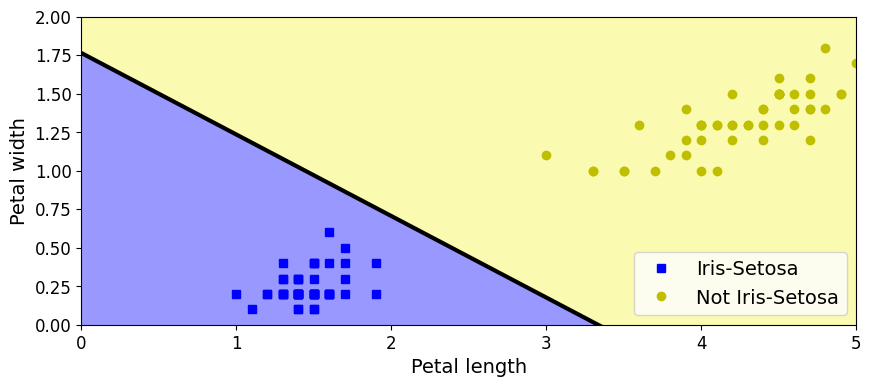

In [40]:
per_clf = Perceptron(max_iter=2000, tol=1e-3)
#max_iter = epoca_max; tol = limiar de precisao
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Not Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

### Aula 03 - Redes perceptron multicamadas (classificação)

Construindo modelos de rede perceptron multicamadas com a biblioteca Keras do TensorFlow

In [41]:
import tensorflow as tf
from tensorflow import keras

##### Classificador de imagens com Keras

Vamos utilizar o dataset fashion MNIST. O MNIST é um dataset de imagens para problemas de classificação multiclasse.

In [42]:
fashion_mnist = keras.datasets.fashion_mnist

Este dataset já contem os dados de treinamento e teste separados. O dataset de treinamento é composto por 60.000 imagens com 28x28 pixels.

In [43]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

Já o dataset de teste é composto por 10.000 imagens de 28x28 pixels.

In [44]:
X_test.shape

(10000, 28, 28)

Cada pixel das imagens é representado por um valor em escala de cinza, que vai de 0 a 255. O tipo das entradas é inteira, sem sinal, de 8 bits.

In [45]:
X_train_full.dtype

dtype('uint8')

###### Separando os dados para validação durante o treinamento

Vamos dividir o dataset de treinamento para separmos um conjunto de validação que será utilizado durante o treinamento. Como o valor máximo de cada pixel pode ser 255, vamos normalizar o valor dos pixels para um valor float entre 0 e 1.

In [47]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Podemos plotar as imagens do dataset utilizando o `imshow()` da biblioteca `matplotlib` com a cor em escala de cinza (mapeamento binário, `'binary'`).





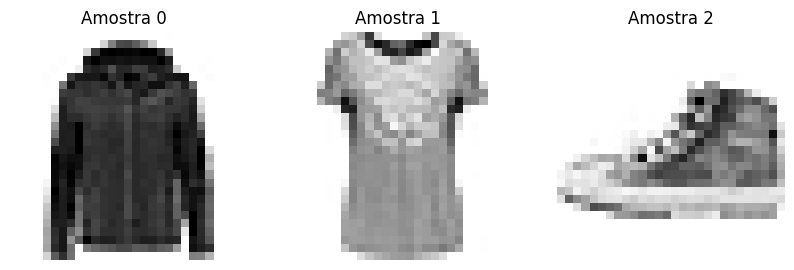

In [48]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(X_train[0], cmap="binary")
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[1], cmap="binary")
plt.title('Amostra 1')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[2], cmap="binary")
plt.title('Amostra 2')
plt.axis('off')
plt.show()

Repare abaixo que os valores armazenados para o rótulo das classes são valores numéricos. Cada classe possui um número que representa:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




Reformulando o item anterior.

In [49]:
from sklearn.model_selection import train_test_split

# Carrega e normaliza
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full = X_train_full.astype("float32") / 255.0
X_test      = X_test.astype("float32")      / 255.0

# Flatten (opcional para camadas densas)
X_train_full = X_train_full.reshape(-1, 28*28)
X_test       = X_test.reshape(-1,      28*28)

# Divide treino/val mantendo proporção de classes
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full,
    test_size=5000/60000,     # 5 000 validação, 55 000 treino
    stratify=y_train_full,    # estratifica por rótulo
    random_state=42           # reprodutível
)

# Agora:
# y_train.value_counts() terá ~5 500 de cada classe
# y_valid.value_counts() terá ~500 de cada classe


In [50]:
print(y_train)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

[0 3 8 ... 6 1 9]


Sendo assim, a primeira imagem do dataset de treinamento é:

In [51]:
class_names[y_train[0]]

'T-shirt/top'

Agora, precisamos ter uma precisamos ter uma matriz 2D de forma (28, 28).
Então, temos que aça o reshape de volta:

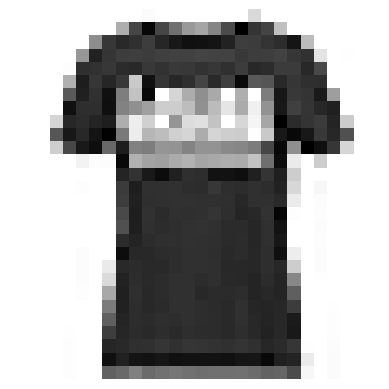

In [60]:
# Supondo que X_train seja shape (n_amostras, 784)
imagem = X_train[0].reshape(28, 28)   # reconstrói 28×28
plt.imshow(imagem, cmap="binary")
plt.axis("off")
plt.show()


Ou, se quiser plotar as três primeiras:

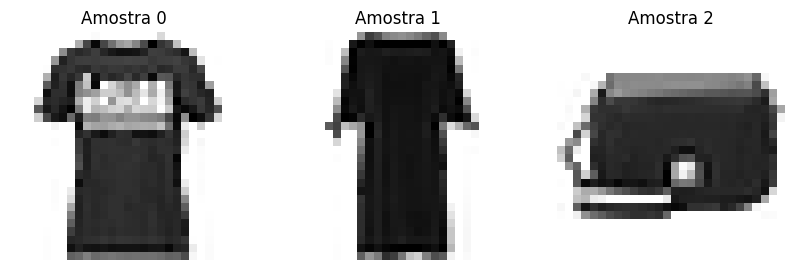

In [63]:
plt.figure(figsize=(10,4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    img = X_train[i].reshape(28, 28)
    plt.imshow(img, cmap="binary")
    plt.title(f"Amostra {i}")
    plt.axis("off")

plt.show()


Temos que importar o matplotlib.pyplot.

Sempre que reiniciar o kernel do notebook ou começar uma nova sessão, você precisa rodar novamente todas as importações,

In [9]:
import matplotlib.pyplot as plt


Criar a variável X_train

In [10]:
# 1) Importe o dataset
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# 2) Normalize os pixels
X_train_full = X_train_full.astype("float32") / 255.0
X_test       = X_test.astype("float32")       / 255.0

# 3) Separe validação e treino
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


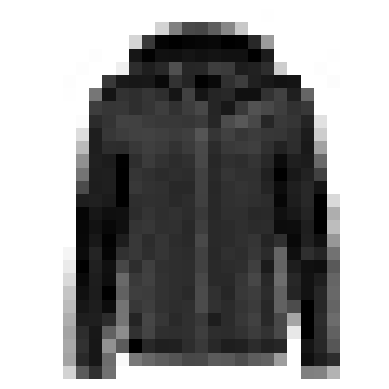

In [11]:
plt.imshow(X_train[0].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()


In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_y = pd.DataFrame(y_train)

In [15]:
df_y.value_counts()

,count
0,
0,5543
4,5512
8,5510
6,5507
5,5507
3,5499
2,5496
9,5494
7,5488


Algumas das imagens do dataset de treinamento:
Criar a variácel variável class_names.

In [17]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


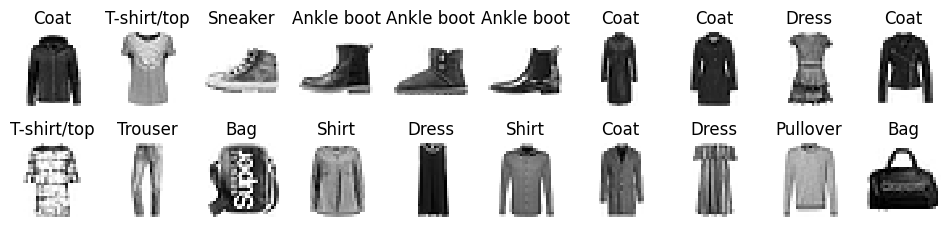

In [18]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

###### Criando o modelo de PMC

Vamos criar um modelo de PMC para classificar as amostras! Como é um problema com imagens, vamos ajustar uma rede com duas camadas escondidas.

In [19]:
# Criando o modelo de PMC
## Declaracao do modelo sequencial para o Keras
model = keras.models.Sequential()
## Camada de entrada (flatten transforma a imagem 28x28 em um vetor 1D de 784 valores)
model.add(keras.layers.Flatten(input_shape=[28, 28]))
## Primeira camada escondida, com 300 neuronios e funcao de ativacao ReLU;
### Cada camada 'Dense' gerencia seus proprios parametros, incluindo bias
model.add(keras.layers.Dense(300, activation="relu"))
## Segunda camada escondida, com 100 neuronios e ReLU
model.add(keras.layers.Dense(100, activation="relu"))
## Camada de saida com 10 neuronios e funcao de ativacao softmax (multiclasse)
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Outra maneira de declarar o modelo sequencial com Keras poderia ser:

In [22]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

A estrutura do modelo pode ser verificada por:

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

E as camadas do modelo por:

In [24]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

Podemos atribuir uma camada a uma variável para manipular os parâmetros da camada.

In [27]:
hidden1 = model.layers[1]
hidden1

<Dense name=dense_6, built=True>

Isso confirma:

Você tem acesso ao objeto Dense completo.

Pode recuperar e ajustar os parâmetros via:

In [28]:
weights, biases = hidden1.get_weights()


Os parâmetros de cada camada podem ser acessados e alterados com os métodos `get_weights()` e `set_weights()`

In [29]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00798947,  0.04962823,  0.01840006, ...,  0.02020088,
         0.06160104,  0.04145762],
       [ 0.00087992,  0.03109401,  0.05698743, ...,  0.06473231,
         0.02256753, -0.03523699],
       [-0.00588293, -0.05883699, -0.03279154, ...,  0.05405924,
         0.07436764,  0.07263832],
       ...,
       [-0.04359175, -0.04824693,  0.07340477, ...,  0.04789806,
        -0.0547362 ,  0.05113988],
       [-0.07004024,  0.02355931, -0.05658225, ..., -0.06300071,
        -0.0671241 ,  0.07325867],
       [ 0.06251149,  0.04329542,  0.05686468, ...,  0.04628418,
         0.02450346, -0.01685302]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [31]:
biases.shape

(300,)

A finalização do modelo é feita compilando as últimas informações que devem ser repassadas à estrutura do PMC, a função de otimização, o otimizador e o indicador de métrica.

In [32]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

O modelo está pronto para treinar usando o programa:

In [33]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_valid, y_valid)
)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6803 - loss: 1.0243 - val_accuracy: 0.8272 - val_loss: 0.5202
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8237 - loss: 0.5103 - val_accuracy: 0.8290 - val_loss: 0.4722
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8429 - loss: 0.4468 - val_accuracy: 0.8528 - val_loss: 0.4229
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8513 - loss: 0.4220 - val_accuracy: 0.8688 - val_loss: 0.3889
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8609 - loss: 0.4000 - val_accuracy: 0.8680 - val_loss: 0.3870
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8657 - loss: 0.3837 - val_accuracy: 0.8664 - val_loss: 0.3802
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8712 - loss: 0.3699 - val_accuracy: 0.8732 - val_loss: 0.3685
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8755 - loss: 0.3547 

A função de otimização `'sparse_categorical_crossentropy'` é utilizada porque cada saída está rolutada de 0 a 9. Se fosse um vetor dummy (`[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]`), poderíamos utilizar a função `'categorical_crossentropy'`.

Se fosse um problema de classificação binária, utilizaríamos a função `'binary_crossentropy'` e a função de ativação `'sigmoid'` como função de ativação na camada de saída.

###### Treinando o modelo de PMC

O treinamento do modelo é feito utilizando o método `'fit()'` para a classe model.

In [34]:
# dados
# instanciar o modelo
# treinar
# avaliar

In [ ]:
history = model.fit(X_train,y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6832 - loss: 1.0139 - val_accuracy: 0.8274 - val_loss: 0.5130
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8203 - loss: 0.5130 - val_accuracy: 0.8360 - val_loss: 0.4643
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8407 - loss: 0.4505 - val_accuracy: 0.8554 - val_loss: 0.4143
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8505 - loss: 0.4209 - val_accuracy: 0.8588 - val_loss: 0.4049
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8565 - loss: 0.4019 - val_accuracy: 0.8662 - val_loss: 0.3876
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8669 - loss: 0.3776 - val_accuracy: 0.8680 - val_loss: 0.3840
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8728 - loss: 0.3635 - val_accuracy: 0.8696 - val_loss: 0.3717
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8754 - loss: 0.3540

Para treinar e avaliar seu Perceptron Multicamadas (PMC) com Keras, siga este fluxo:

In [35]:
import tensorflow as tf
from tensorflow import keras

# 1) Carregar e preparar dados
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalização
X_train_full = X_train_full.astype("float32") / 255.0
X_test       = X_test.astype("float32")       / 255.0

# Dividir treino/validação
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full,
    test_size=5000/60000,
    stratify=y_train_full,
    random_state=42
)

# 2) Definir o modelo PMC
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 3) Compilar (define loss, otimizador, métricas)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

# 4) Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_valid, y_valid)
)

# 5) Avaliar em dados de teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6669 - loss: 1.0312 - val_accuracy: 0.8218 - val_loss: 0.5126
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8243 - loss: 0.5068 - val_accuracy: 0.8248 - val_loss: 0.4868
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8421 - loss: 0.4567 - val_accuracy: 0.8598 - val_loss: 0.4116
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8531 - loss: 0.4213 - val_accuracy: 0.8702 - val_loss: 0.3847
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8569 - loss: 0.4059 - val_accuracy: 0.8774 - val_loss: 0.3604
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8651 - loss: 0.3845 - val_accuracy: 0.8804 - val_loss: 0.3568
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8691 - loss: 0.3725 - val_accuracy: 0.8814 - val_loss: 0.3393
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8723 - loss: 0.3557

Outra forma de dividir o dataset para treinamento e validação (ao invés de usar o argumento `validation_data`) é utilizar o argumento `validation_split=0.1` para passar a quantidade de dados que devem ser utilizados para a validação durante a fase de treinamento.

###### Analisando os resultados do treinamento

O treinamento do modelo armazenou o histórico de todas as épocas no dicionário `history`. Podemos transformar este dicionário em um DataFrame do Pandas e manipular os dados dele para identificar o melhor modelo treinado.

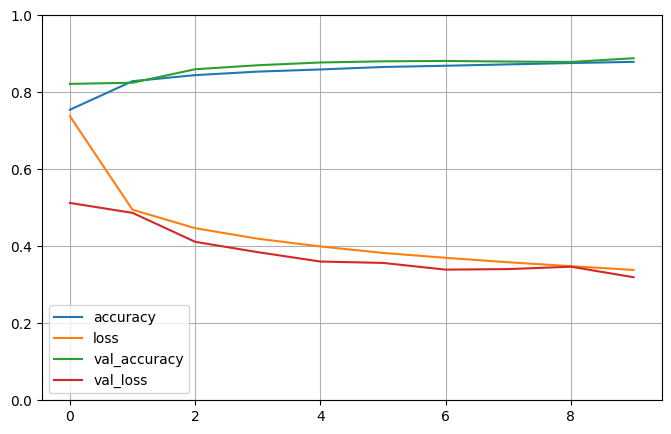

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

Conseguimos um bom desempenho com este modelo e sem uma tendência de overfitting. Podemos ver isto porque o `loss` e o `val_loss`continuam diminuindo, apesar do `val_loss` estar com uma inclinação quase nula no final da última época treinada. Se o modelo continuasse o ajuste dos parâmetros, o `loss` continuaria descendo, mas, provavelmente, o `val_accuraccy` deixaria de acompanhar o `accuraccy` de treinamento.

Se o comportamento do modelo não foi satisfatório ainda depois do treinamento, podemos alterar os hiperparâmetros de treinamento, começando pela taxa de aprendizagem, o otimizador, número de camadas, número de neurônios por camada e os tipos de função de ativação.

Uma vez satisfeito com o modelo, podemos utilizar o dataset de teste para verificar mais uma vez o desempenho do PMC.

In [37]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8669 - loss: 0.3750


[0.37984466552734375, 0.8626999855041504]

In [38]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, np.argmax(y_pred,axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[789,   0,  19,  65,   3,   1, 110,   1,  12,   0],
       [  1, 961,   1,  29,   4,   0,   3,   0,   1,   0],
       [ 10,   0, 832,  19,  92,   1,  38,   0,   8,   0],
       [ 16,   9,  14, 899,  30,   0,  26,   0,   6,   0],
       [  0,   0, 125,  41, 778,   1,  45,   0,  10,   0],
       [  0,   0,   0,   1,   0, 949,   0,  34,   2,  14],
       [118,   2, 145,  53,  87,   1, 569,   0,  25,   0],
       [  0,   0,   0,   0,   0,  31,   0, 930,   0,  39],
       [  0,   1,   4,   8,   4,   4,   5,   4, 970,   0],
       [  0,   0,   0,   0,   0,  11,   0,  38,   1, 950]])

Gerer matriz de Confusão:

In [40]:
from sklearn.metrics import confusion_matrix
import numpy as np

# 1) Gerar previsões
y_pred = model.predict(X_test)

# 2) Calcular matriz de confusão
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Plotar com Seaborn:

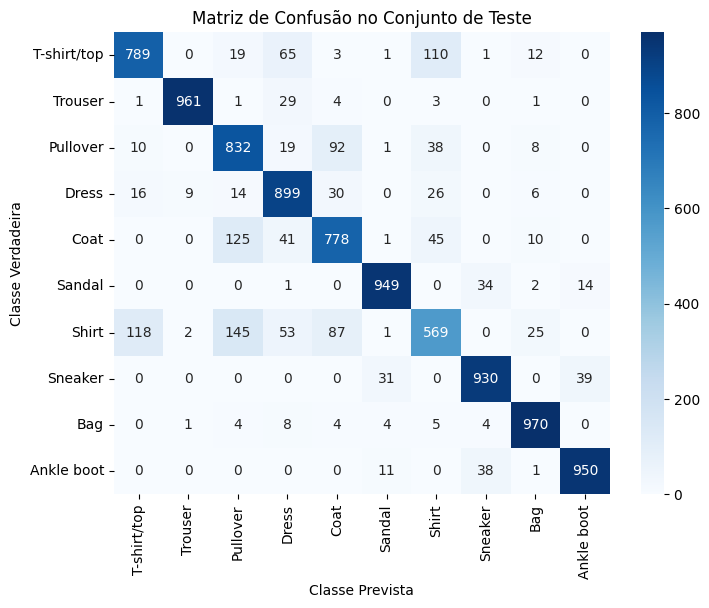

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão no Conjunto de Teste")
plt.show()


Para tornar essa matriz mais informativa, você pode exibi-la como um mapa de calor:

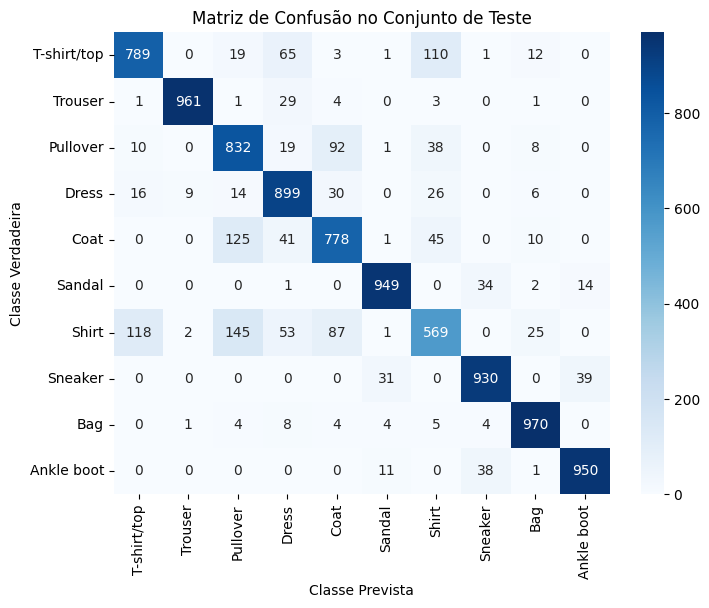

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão no Conjunto de Teste")
plt.show()


Para gerar e exibir corretamente a matriz de confusão, devemos:

Calcular as previsões e a matriz de confusão

Plotar somente essa matriz, sem misturar com correlações de features que não se aplicam ao Fashion-MNIST.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusão


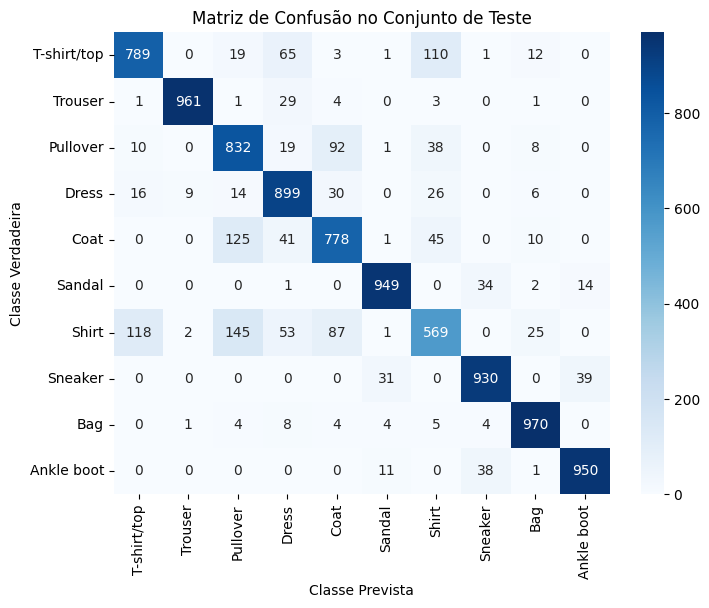

In [47]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Gera previsões
y_pred = model.predict(X_test)

# 2) Calcula matriz de confusão
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# 3) Exibe título e matriz
print("Matriz de Confusão")
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão no Conjunto de Teste")
plt.show()


Para gerar a matriz de confusão :siga estes passos:
1) Calcule as previsões e a matriz de confusão:

In [48]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


2. Exiba o mapa de calor da matriz de confusão:

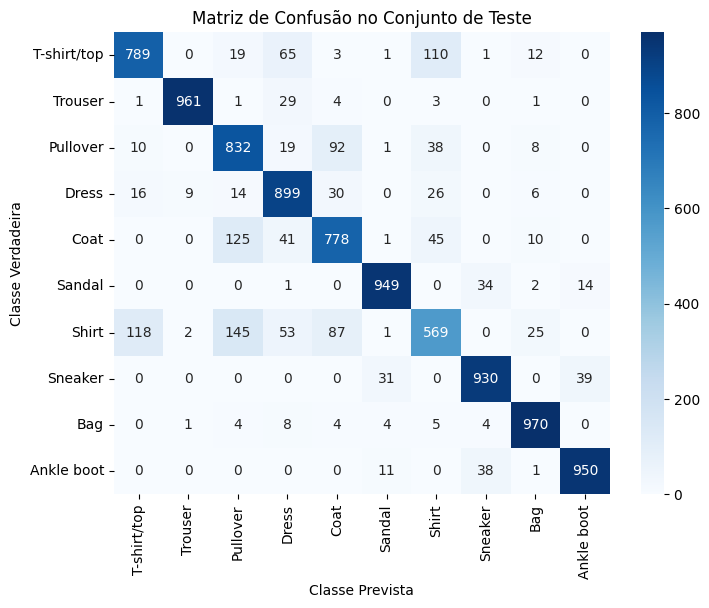

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão no Conjunto de Teste")
plt.show()


Remova todo o bloco que tenta calcular correlação (corrMatrix = X_test[used_features].corr()) pois ele não se aplica a imagens. Dessa forma, você terá corretamente a matriz de confusão para avaliar quais classes seu modelo confunde com mais frequência.

Para corrigir, você tem duas opções:
1) Definir explicitamente used_features (não aplicável aqui):


In [52]:
used_features = ['pixel0', 'pixel1', ..., 'pixel783']


2) Remover todo o código de correlação, já que não se aplica a imagens, e focar apenas na matriz de confusão:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusão


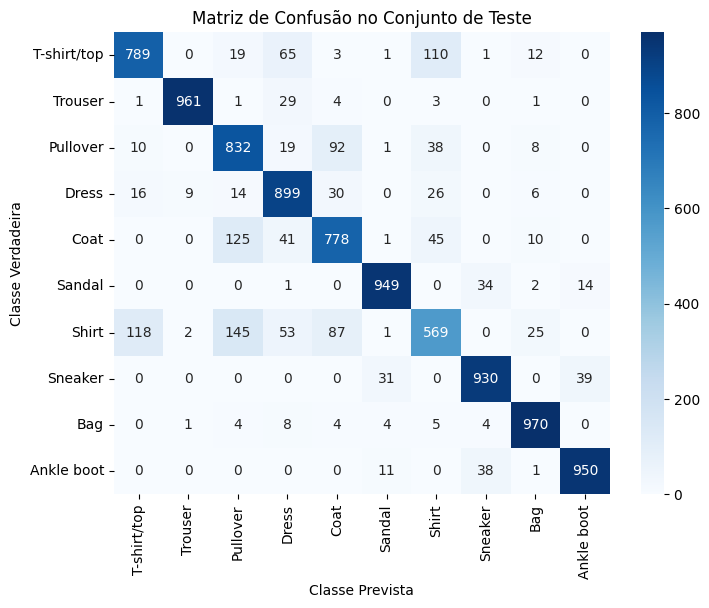

In [54]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Gera previsões
y_pred = model.predict(X_test)

# 2) Calcula matriz de confusão
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# 3) Plota a matriz de confusão
print("Matriz de Confusão")
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão no Conjunto de Teste")
plt.show()


In [64]:
## matriz de confusão

print("Matrix de confusão")
plt.show()

corrMatrix = X_test[used_features].corr()
plt.matshow(corrMatrix)
plt.show()

f = plt.figure(figsize=(10, 10))
plt.matshow(corrMatrix, fignum=f.number)
plt.xticks(
    range(X_test[used_features].shape[1]),
    X_test[used_features].columns,
    fontsize=10,
    rotation=90
)
plt.yticks(
    range(X_test[used_features].shape[1]),
    X_test[used_features].columns,
    fontsize=10
)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)



Matrix de confusão


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

O código abaixo mostra a célula que foi modificada para remover a tentativa de calcular a matriz de correlação em dados de imagem, o que causava o `IndexError`.

In [65]:
## matriz de confusão

print("Matrix de confusão")
# plt.show()

# corrMatrix = X_test[used_features].corr()
# plt.matshow(corrMatrix)
# plt.show()

# f = plt.figure(figsize=(10, 10))
# plt.matshow(corrMatrix, fignum=f.number)
# plt.xticks(
#     range(X_test[used_features].shape[1]),
#     X_test[used_features].columns,
#     fontsize=10,
#     rotation=90
# )
# plt.yticks(
#     range(X_test[used_features].shape[1]),
#     X_test[used_features].columns,
#     fontsize=10
# )
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)

Matrix de confusão


###### Utilizando o modelo para fazer predições

Acertado o modelo, podemos começar a fazer predições para aplicação. Vamos tomar algumas amostras do dataset de teste para verificar as predições.

In [66]:
X_new = X_test
y_proba = model.predict(X_new)
y_proba.round(5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.0000e-05, 1.0000e-05, 1.0000e-05, ..., 7.1740e-02, 4.0100e-03,
        8.8689e-01],
       [4.0000e-05, 0.0000e+00, 9.9321e-01, ..., 0.0000e+00, 1.0000e-05,
        0.0000e+00],
       [5.0000e-05, 9.9988e-01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.3720e-02, 0.0000e+00, 3.3200e-03, ..., 7.0000e-05, 9.3935e-01,
        0.0000e+00],
       [1.0000e-05, 9.9949e-01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.7000e-04, 1.3000e-04, 7.8000e-04, ..., 3.4910e-02, 8.3400e-03,
        1.6700e-03]], dtype=float32)

Para converter essas probabilidades em rótulos previstos, use:

In [68]:
y_pred = np.argmax(y_proba, axis=1)


pode exibir algumas previsões lado a lado com as imagens reais:

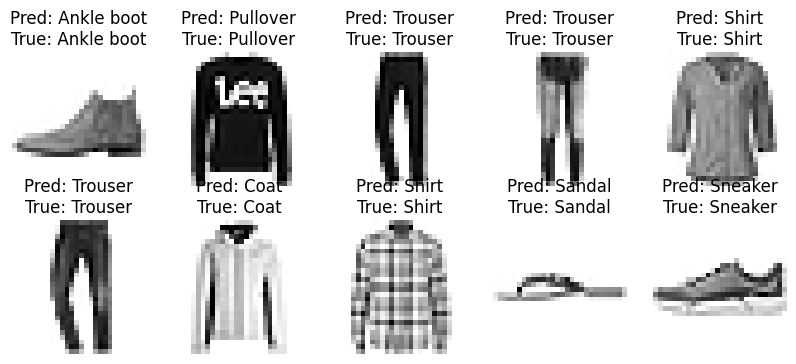

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_new[i], cmap="binary")
    plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[y_test[i]]}")
    plt.axis("off")
plt.show()


In [70]:
for i in y_proba:
  print(i.round(3))

A saída de streaming foi truncada nas últimas 5000 linhas.
[0.    0.    0.951 0.    0.029 0.    0.019 0.    0.001 0.   ]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.376 0.    0.024 0.    0.004 0.    0.251 0.    0.345 0.   ]
[0.    0.    0.014 0.    0.984 0.    0.002 0.    0.    0.   ]
[0.    0.    0.062 0.    0.556 0.    0.38  0.    0.001 0.   ]
[0.008 0.016 0.004 0.949 0.005 0.006 0.006 0.002 0.003 0.001]
[0.001 0.006 0.001 0.971 0.019 0.    0.001 0.    0.001 0.   ]
[0.    0.    0.    0.    0.    0.    0.    0.001 0.    0.999]
[0.002 0.001 0.024 0.01  0.956 0.    0.001 0.    0.007 0.   ]
[0.    0.    0.    0.    0.    0.    0.    0.981 0.    0.019]
[0.976 0.    0.001 0.001 0.    0.    0.022 0.    0.    0.   ]
[0.001 0.    0.    0.    0.    0.    0.    0.    0.999 0.   ]
[0.038 0.001 0.214 0.51  0.101 0.011 0.043 0.    0.082 0.   ]
[0.    0.    0.    0.    0.    0.976 0.    0.    0.005 0.019]
[0.258 0.011 0.022 0.302 0.002 0.    0.404 0.    0.001 0.   ]
[0.018 0.132 0.141 0.046 0.633 0.    0.02

Se quiser ver apenas as primeiras 5 previsões para não inundar o console:

In [71]:
for i in y_proba[:5]:
    print(i.round(3))


[0.    0.    0.    0.    0.    0.037 0.    0.072 0.004 0.887]
[0.    0.    0.993 0.    0.003 0.    0.003 0.    0.    0.   ]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.107 0.    0.13  0.016 0.023 0.    0.718 0.    0.006 0.   ]


In [73]:
list(y_test[:3])

[np.uint8(9), np.uint8(2), np.uint8(1)]

In [74]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [75]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [76]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

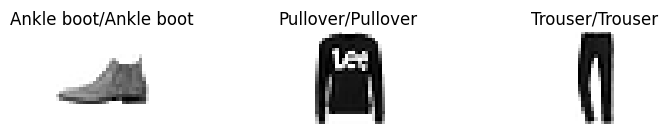

In [77]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 3, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]] + '/' + class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()